# Bank Customer Segmentation

#### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

## Importing Libraries and Loading dataset

In [1]:
import numpy as np
import pandas as pd

##  Read the data and do exploratory data analysis. Describe the data briefly

In [2]:
data_1=pd.read_csv(r'C:\Users\kanth\Desktop\PGP-DSBA\04. Data Mining\Project\bank_marketing_part1_Data.csv')

## Checking the data


In [3]:
data_1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
data_1.shape

(210, 7)

#### This dataset has been loaded successfully and it contains 210 rows of observations and 7 columns of variables indicating the different activities of the bank users

In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


#### This data consists of all float values and it doesnt seem to have any missing data as of now.

In [6]:
data_1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


#### This data isn't scaled. So, in order to proceed further with clustering the data should be scaled first.
#### Since Hierarchical clustering is a distance based method, scaling needs to be done on un-scaled data. Extreme values in different variables like spending (mean=14) and probability_of_full_payment (mean=0.8) can cause in failure in model.

## Check for duplicate data

In [7]:
dups=data_1.duplicated()
print('Number of duplicate rows = %d' %(dups.sum()))
data_1[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


## Importing the libraries for Data visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

array([[<AxesSubplot:title={'center':'spending'}>,
        <AxesSubplot:title={'center':'advance_payments'}>,
        <AxesSubplot:title={'center':'probability_of_full_payment'}>],
       [<AxesSubplot:title={'center':'current_balance'}>,
        <AxesSubplot:title={'center':'credit_limit'}>,
        <AxesSubplot:title={'center':'min_payment_amt'}>],
       [<AxesSubplot:title={'center':'max_spent_in_single_shopping'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

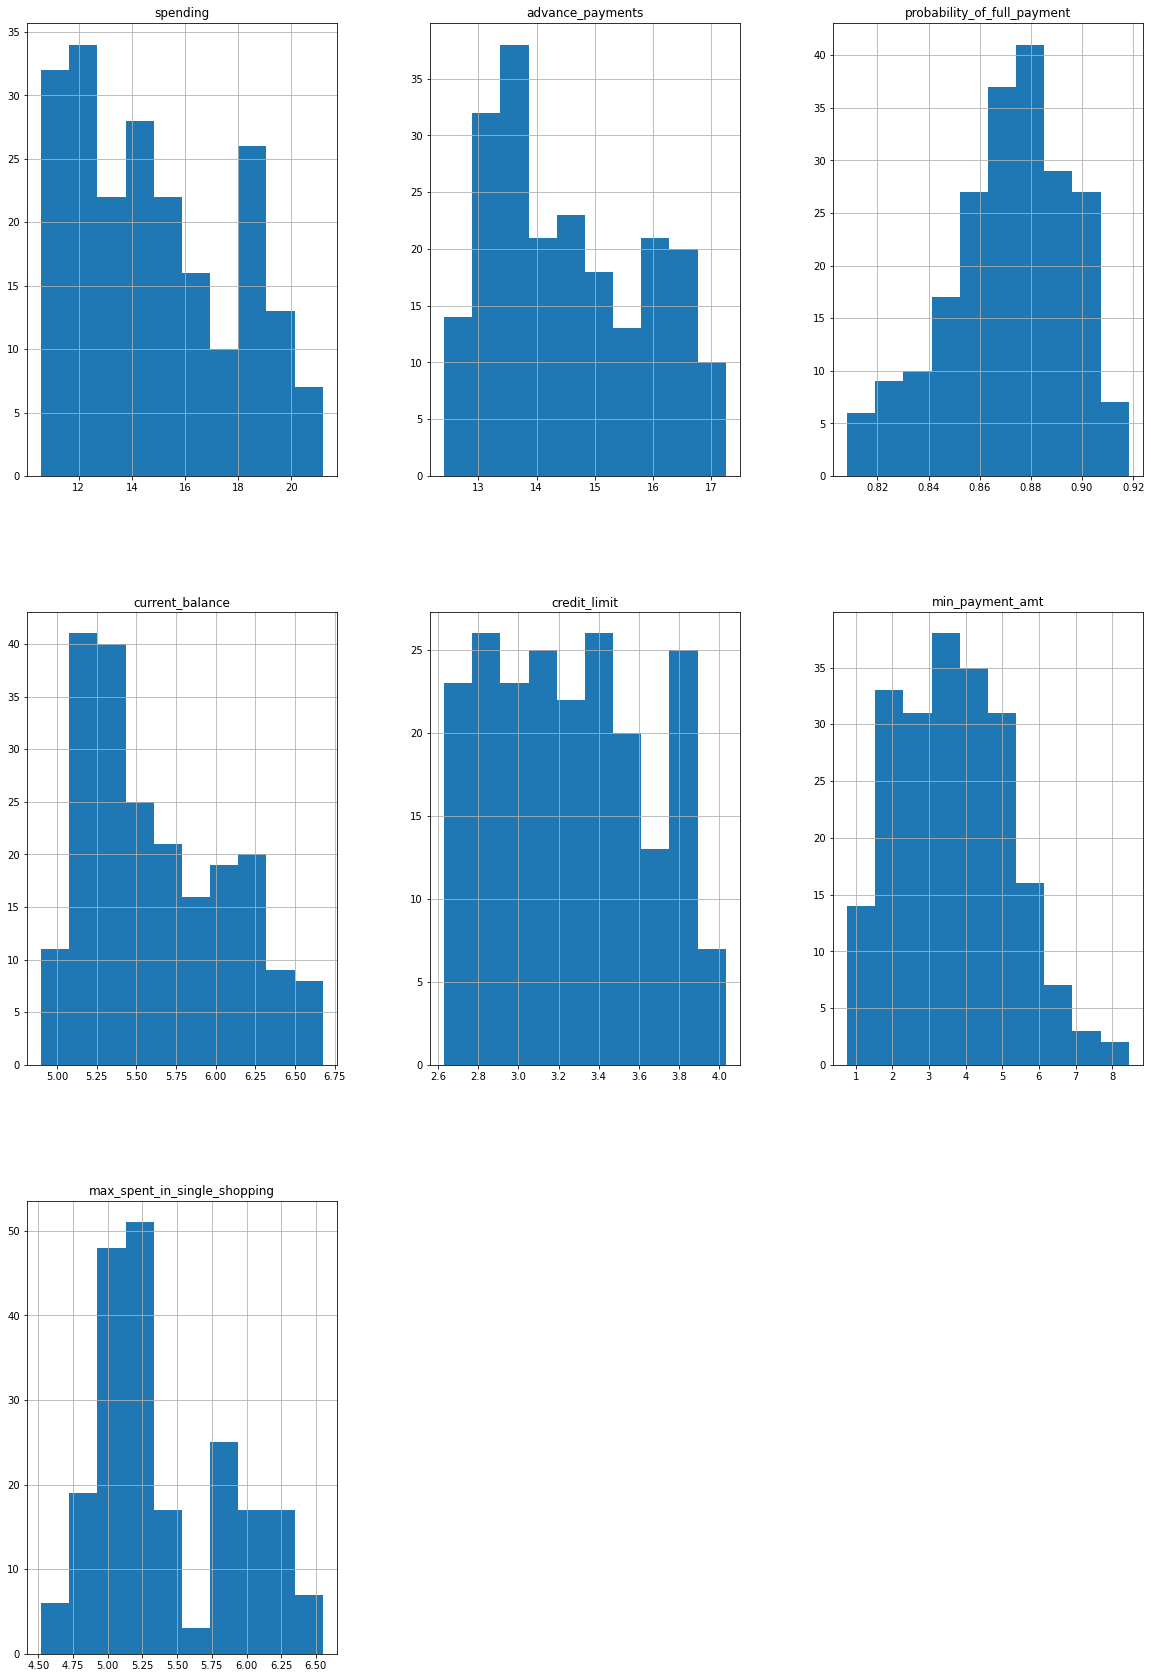

In [9]:
data_1.hist(figsize=(20,30))

<AxesSubplot:>

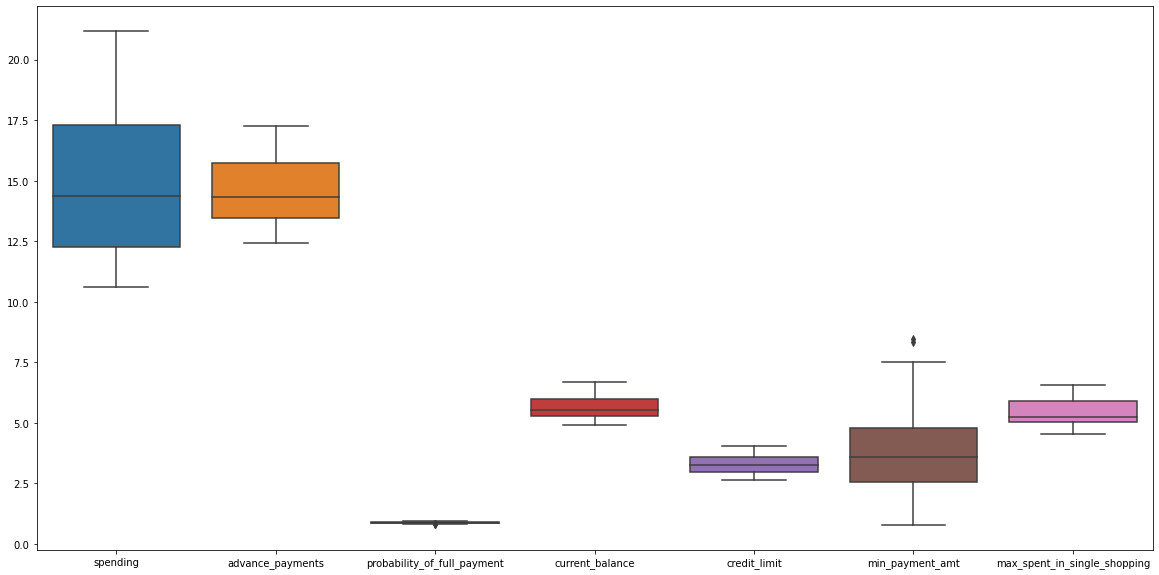

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_1)

In [11]:
data_1.cov()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,8.466351,3.778443,0.041823,1.224704,1.066911,-1.004356,1.235133
advance_payments,3.778443,1.705528,0.016332,0.562666,0.466065,-0.426766,0.571753
probability_of_full_payment,0.041823,0.016332,0.000558,0.003852,0.006798,-0.011777,0.002634
current_balance,1.224704,0.562666,0.003852,0.196305,0.143992,-0.114290,0.203125
credit_limit,1.066911,0.466065,0.006798,0.143992,0.142668,-0.146543,0.139068
min_payment_amt,-1.004356,-0.426766,-0.011777,-0.114290,-0.146543,2.260684,-0.008187
max_spent_in_single_shopping,1.235133,0.571753,0.002634,0.203125,0.139068,-0.008187,0.241553


In [12]:
data_1.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


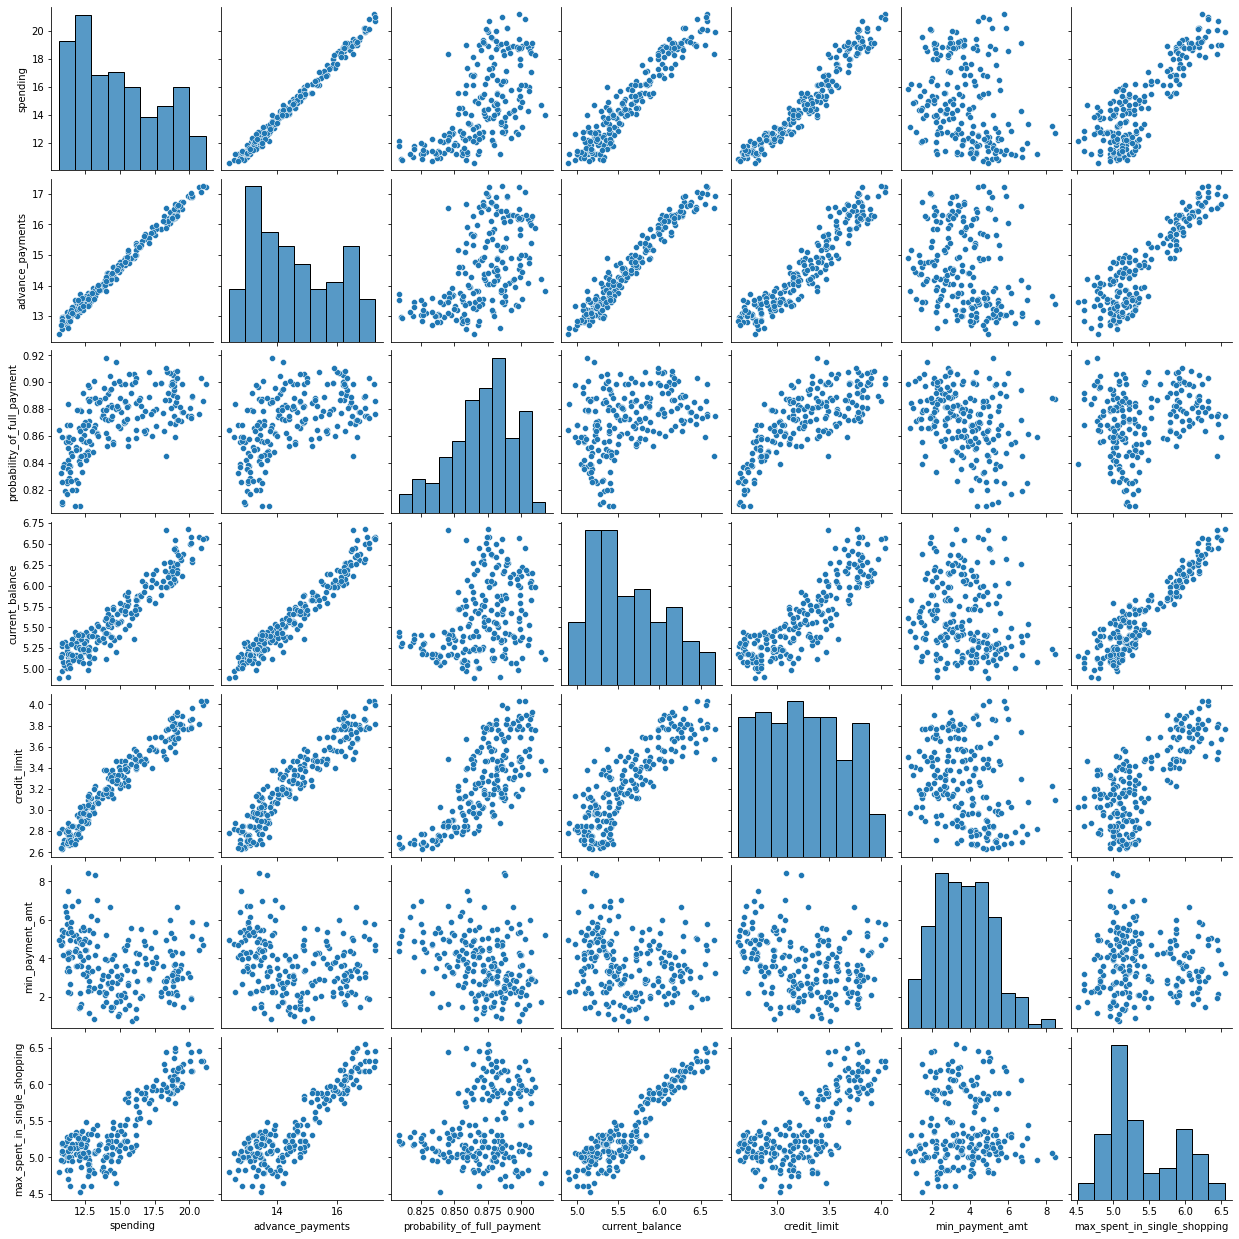

In [13]:
sns.pairplot(data_1)

<AxesSubplot:>

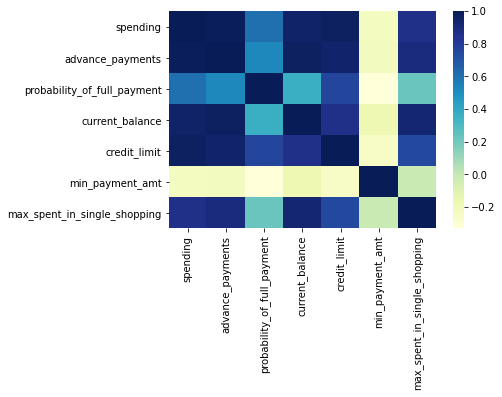

In [14]:
sns.heatmap(data_1.corr(),cmap="YlGnBu")

#### Since Heirarchical clustering is a distance based method, scaling needs to be done on unscaled data

## Importing the library for scaling

In [15]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale

StandardScaler()

In [16]:
data_1_scaled = std_scale.fit_transform(data_1)

In [17]:
print(data_1_scaled)

[[ 1.75435461  1.81196782  0.17822987 ...  1.33857863 -0.29880602
   2.3289982 ]
 [ 0.39358228  0.25383997  1.501773   ...  0.85823561 -0.24280501
  -0.53858174]
 [ 1.41330028  1.42819249  0.50487353 ...  1.317348   -0.22147129
   1.50910692]
 ...
 [-0.2816364  -0.30647202  0.36488339 ... -0.15287318 -1.3221578
  -0.83023461]
 [ 0.43836719  0.33827054  1.23027698 ...  0.60081421 -0.95348449
   0.07123789]
 [ 0.24889256  0.45340314 -0.77624835 ... -0.07325831 -0.70681338
   0.96047321]]


## Importing library for Hierarchical clustering

#### The type of hierarchical clustering method we used here is agglomerative in which each row is considered as a cluster and based on the distances between each cluster, the same will get merged. The type of linkage method used in the model is Ward’s linkage. Applying dendrogram to the data to visualize the clusters in two cases, one without extra parameters without truncation and second with truncation to lastp(p=10).

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
wardlink = linkage(data_1_scaled, method = 'ward')

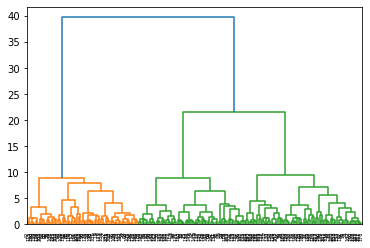

In [20]:
dend = dendrogram(wardlink)

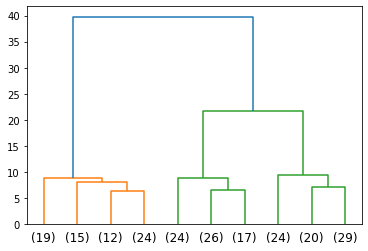

In [21]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

#### From the above images of dendrograms we can conclude by saying that data can be divided into 2 clusters green (70 rows) & red (140 rows). So, the credit card customers can be divided into two clusters.

In [22]:
from scipy.cluster.hierarchy import fcluster

In [23]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [24]:
data_1['clusters'] = clusters

In [25]:
data_1.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,3
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2


## Applying K-means clustering to the data

#### Initially the scaled data is fitted in K-means clustering model with a random of clusters since the optimum number of clusters is unknown yet. Then WSS plot or elbow curve is drawn using the inertia values at different number of clusters. Inertia is the total of within sum of squares of each cluster. This value gets reduced with each cluster, but after certain limit the inertia value doesn’t show any significant drop which implies that additional cluster is unnecessary. At that point we can finalize the optimal number of clusters.

In [26]:
from sklearn.cluster import KMeans

#### Assigning random number of clusters to see the inertia score at different cases.

In [27]:
k_means = KMeans(n_clusters = 1)

In [28]:
k_means.fit(data_1_scaled)

KMeans(n_clusters=1)

In [29]:
k_means.inertia_

1469.9999999999998

In [30]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data_1_scaled)
k_means.inertia_

659.171754487041

In [31]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_1_scaled)
k_means.inertia_

430.6589731513006

In [32]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data_1_scaled)
k_means.inertia_

371.65314399951626

In [33]:
k_means = KMeans(n_clusters = 5)
k_means.fit(data_1_scaled)
k_means.inertia_

326.36760226583755

In [34]:
k_means = KMeans(n_clusters = 6)
k_means.fit(data_1_scaled)
k_means.inertia_

289.9227731937566

## WSS or Elbow Plot

In [35]:
wss = []

In [36]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_1_scaled)
    wss.append(KM.inertia_)

In [37]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.1846125351018,
 326.5136953844313,
 288.95334686682884,
 262.71158241464883,
 240.1999245247286,
 222.74476252089715,
 208.4331972035936]

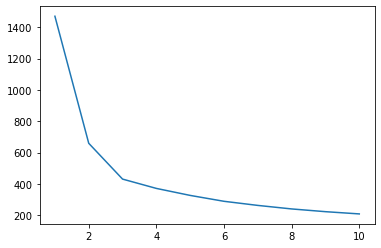

In [38]:
plt.plot(range(1,11), wss)

#### From the graph it is evident there isn’t any significant drop in inertia from 3 to 4 we can conclude with 3 clusters. Evaluation of K-means model using Silhouette score and Silhouette widths: The silhouette score of the two clusters created is an average of 0.40 which is a positive value. And the Silhouette widths for each observation are calculated and added as a column in the dataset.

In [39]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_1_scaled)
labels = k_means.labels_

In [40]:
data_1['Kmeans_clusters'] = labels
data_1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Kmeans_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0


## Silhouette Scores

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score

### Silhouette Score for K=3

In [42]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_1_scaled)
labels = k_means.labels_

In [43]:
silhouette_score(data_1_scaled,labels)

0.4007270552751299

In [44]:
sil_width = silhouette_samples(data_1_scaled,labels)

In [45]:

data_1['sil_width'] = sil_width
data_1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Kmeans_clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,1,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0,0.362276


## Cluster Profiling

In [46]:
data_1.Kmeans_clusters.value_counts().sort_index()

0    67
1    71
2    72
Name: Kmeans_clusters, dtype: int64

In [47]:
clus_pro=data_1.drop(['sil_width'],axis=1)
clus_pro=data_1.groupby('Kmeans_clusters').mean()
clus_pro['frequency']=data_1.Kmeans_clusters.value_counts().sort_index()
clus_pro

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width,frequency
Kmeans_clusters,,,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.468772,67
1,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,0.339816,71
2,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,0.397473,72


#### Cluster 0: Customers with lowest average spending per month, with lowest credit limit & highest minimum payment amount and frequency of 72
#### Cluster 1: Customers with highest average spending per month, with highest current balance & highest max spent in single shopping and a frequency if 67
#### Cluster 2: Customers with medium average spending per month, with lowest minimum payment amount and a frequency if 71

### Recommendations for Promotional Strategies:

1. Customers in Cluster 1 can be considered as Elite customers as their spendings per month and Maximum amount spent in single shopping are the highest. Hence, as a promotional offer their Credit limit can be extended.

2. For Customers in Cluster 2, due to their medium financial situation, loans like vehicle loans and Home loans can be provided with lesser interest rates.

3. For Customers in Clusters 0 & 2, Coupons can be given to increase their frequency in shopping.